In [150]:
import glob
import h5py as h5
import numpy as np
import os
import sys




from matplotlib import use
use('Agg')
from matplotlib import pyplot

%matplotlib inline

/home/mike/anaconda3/envs/pysac-27/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mike/anaconda3/envs/pysac-27/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mike/anaconda

In [152]:
basedir='/mnt/xdrive/Users/cs1mkg/temp/' #For linux desktop remote mount to research data store
#basedir='/shared/sp2rc2/Users/cs1mkg/temp/' #For automounted research data storage from ShARC
output='output-th15ph90'
files=sorted(glob.glob(basedir+output+'/flds.tot*'))
prtfiles=sorted(glob.glob(basedir+output+'/prtl.tot*'))
# go through the files
start=0
end=len(files)
interval=5
global d
d=[]

In [153]:
for filenum in range(start,end,interval):
    print "reading",files[filenum]
    f = h5.File(files[filenum],"r")
    f1 = h5.File(prtfiles[filenum],"r")
    dict={'bz':np.squeeze(f['bz']),'dens':np.squeeze(f['dens']),
          'v3x':np.squeeze(f['v3x']),'v3xi':np.squeeze(f['v3xi']),
          'pxi':np.squeeze(f1['ui']),'pyi':np.squeeze(f1['vi']),
          'pzi':np.squeeze(f1['wi']),'pxe':np.squeeze(f1['ue']),
          'pye':np.squeeze(f1['ve']),'pze':np.squeeze(f1['we']),
          'xi':np.squeeze(f1['xi']),'xe':np.squeeze(f1['xe'])}    
    d.append(dict)

reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.001
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.006
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.011
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.016
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.021
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.026
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.031
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.036
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.041
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.046
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.051
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.056
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.061
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot.066
reading /mnt/xdrive/Users/cs1mkg/temp/output-th15ph90/flds.tot

In [154]:
print len(dict['v3xi'])

130


In [116]:
print len(d)
de=d[39]
rho=de['dens']
bz=de['bz']
print np.shape(rho)

40
(130, 652)


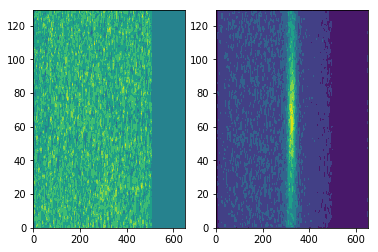

In [117]:
#
# Plot density field
#
fig1,ax1 = pyplot.subplots(1,2,num=1)

#ax1[0].imshow(rho)
#ax1[1].imshow(bz)

ax1[0].contourf(d[it]['bz'])
ax1[1].contourf(d[it]['dens'])

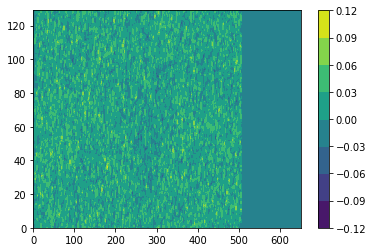

In [118]:
fig2, ax2 = pyplot.subplots()
itstep=1
it=20

cs = ax2.contourf(d[it]['bz'])
cbar = fig2.colorbar(cs)

pyplot.show()  

In [119]:
#compute average density over x-direction
rhoav=np.zeros([652])
dtemp=np.zeros([130])
it=39
dens=d[it]['dens']
for ix in range(0,651,1):
    for iy in range(0,129,1):
        dtemp[iy]=dens[iy][ix]    
    rhoav[ix]=np.mean(dtemp)

In [120]:
print(np.shape(dens))
#dtemp=dens[0][651]
print(np.shape(dtemp))
print(np.shape(rhoav))
print(rhoav)
print(rhoav[0],rhoav[651])

(130, 652)
(130,)
(652,)
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.11501189  0.37488261  0.65667881  0.75627715  0.81005367
  0.77565362  0.72392854  0.73288303  0.76175742  0.74713442  0.77518226
  0.80149224  0.77905131  0.80645395  0.779036    0.82463659  0.82029636
  0.79804705  0.80861807  0.81896754  0.83351452  0.80125263  0.78338177
  0.77737453  0.80934728  0.81458235  0.83926873  0.84018747  0.83048507
  0.83144513  0.86994669  0.92372126  0.90195329  0.85158301  0.81191104
  0.86034041  0.87935748  0.85333139  0.86467464  0.85268495  0.84675982
  0.83090997  0.87222556  0.86574362  0.84658754  0.86258968  0.87445333
  0.90556049  0.90542978  0.89348936  0.86670784  0.88369042  0.92290717
  0.94083476  0.89961285  0.89689262  0.86189672  0.86319671  0.89377309
  0.93030619  0.918142    0.89760002  0.86269872  0.90249662  0.8994483
  0.88538941  0.87936806  0.8940167   0.88743232  0.91452217  0.92916013
  0.89790303  0.8556161

In [121]:
#compute mean density for each time step
itstep=1
it=20
rhot=np.zeros([40,652])
for it in range(0,39,itstep):
    dens=d[it]['dens']
    rhot[it]=dens[64][:]

In [122]:
#compute average density over y-direction for each time step
rhoavit=np.zeros([652,40])
dtemp=np.zeros([130])

for it in range(0,39,itstep):
    dens=d[it]['dens']
    for ix in range(0,651,1):
        for iy in range(0,129,1):
            dtemp[iy]=dens[iy][ix]    
        rhoavit[ix][it]=np.mean(dtemp)
        
        

In [123]:
print(np.shape(rhot))

(40, 652)


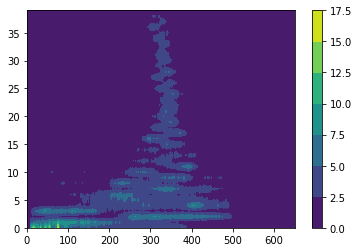

In [124]:
fig3, ax3 = pyplot.subplots()
itstep=1
it=20

cs = ax3.contourf(rhot)
cbar = fig3.colorbar(cs)

pyplot.show()  

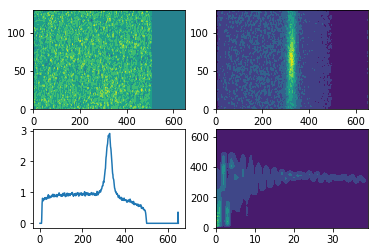

In [127]:
#
# Plot density field
#
it=39
fig4,ax4 = pyplot.subplots(2,2,num=1)

#ax1[0].imshow(rho)
#ax1[1].imshow(bz)

ax4[0][0].contourf(d[it]['bz'])
ax4[0][1].contourf(d[it]['dens'])
ax4[1][0].plot(rhoav)
ax4[1][1].contourf(rhoavit)

(130, 652)
(130, 652)


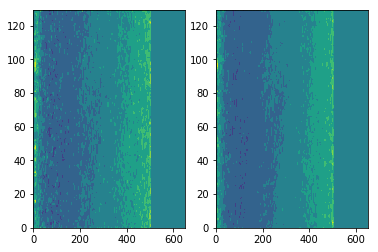

In [172]:
it=5
f1=d[it]['v3xi']
f2=d[it]['v3x']
#print(min(f1),max(f1))
#print(min(f2),max(f2))
#
# Plot density field
#
fig5,ax5 = pyplot.subplots(1,2,num=1)



print(np.shape(f1))
print(np.shape(f2))
ax5[0].contourf(f1)
ax5[1].contourf(f2)

#ax5[0].plot(f1[65,:])
#ax5[1].plot(f2[65,:])

pyplot.show()